### MNIST 손글씨 - CNN v1
- 2 x Conv2D layers
- 1 FCN layer
- 1 Output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
tf.__version__

'2.14.0'

- Data preprocessing

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# X_data의 차원 병경 및 정규화(0 ~ 1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.

In [5]:
# y_data의 one-hot-encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
from keras.api._v2.keras import activations
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18898826 (72.09 MB)
Trainable params: 18898826 (72.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
!mkdir models
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Nov  8 01:41 models
drwxr-xr-x 1 root root 4096 Nov  6 14:20 sample_data


In [10]:
model_path = 'models/best-mnist-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [11]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=256,
    callbacks=[mc, es]
)

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.1674 - accuracy: 0.9469
Epoch 1: val_loss improved from inf to 0.05929, saving model to models/best-mnist-v1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 16s 31ms/step - loss: 0.1674 - accuracy: 0.9469 - val_loss: 0.0593 - val_accuracy: 0.9828
Epoch 2/100
186/188 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9876
Epoch 2: val_loss improved from 0.05929 to 0.05161, saving model to models/best-mnist-v1.h5
188/188 [==============================] - 5s 25ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 3/100
187/188 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9936
Epoch 3: val_loss did not improve from 0.05161
188/188 [==============================] - 4s 22ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0575 - val_accuracy: 0.9849
Epoch 4/100
188/188 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9963
Epoch 4: val_loss did not improve from 0.05161
188/188 [==============================] - 4s 23ms/step - loss: 0.0102 - accuracy: 0.9963 - val_loss: 0.0549 - val_accuracy: 0

In [12]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9861


[0.04437236487865448, 0.9861000180244446]

- 학습과정 시각화

In [13]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

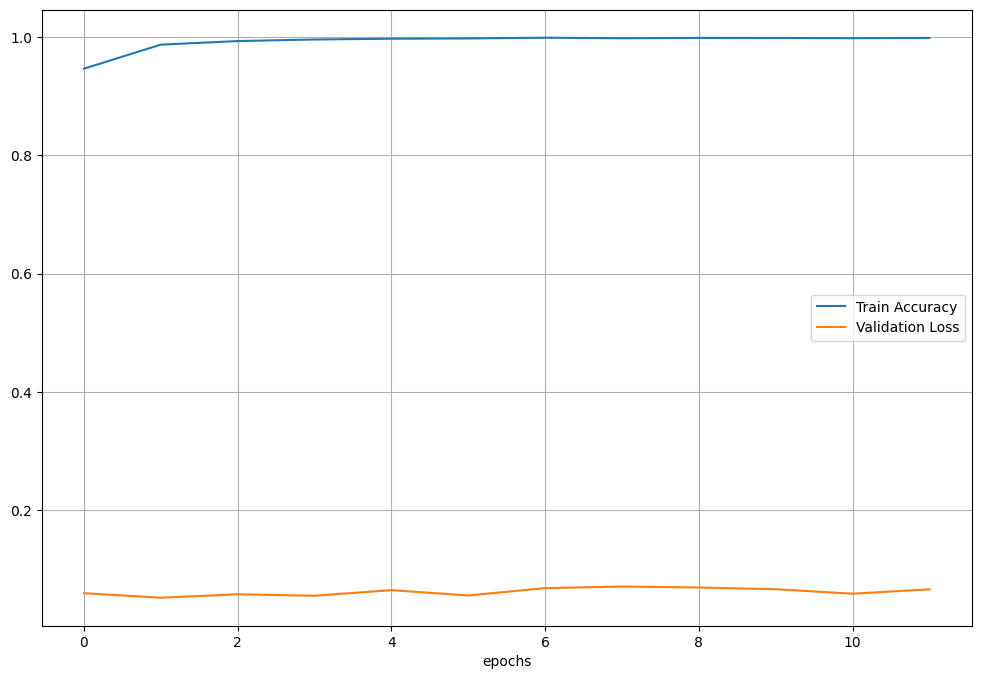

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='Train Accuracy')
plt.plot(xs, y_vloss, label='Validation Loss')
plt.legend(), plt.grid(), plt.xlabel('epochs')
plt.show()